##  作業

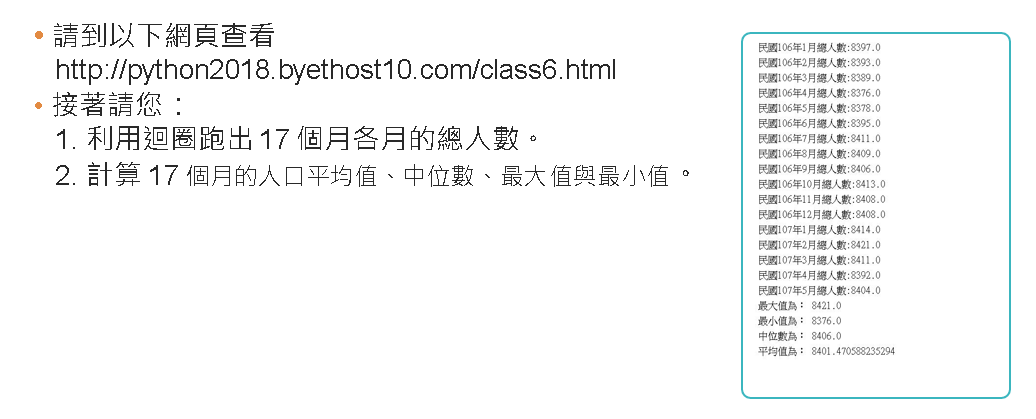

In [ ]:
import numpy as np
list = [8397,8393,8389,8376,8378,8395,8411,8409,8406,8413,8408,8408,8414,8421,8411,8392,8404]
npArray = np.array(list)
month = 1
year = 106
for v in npArray:
    print(f'民國{year}年{month}月總人數:{v:.1f}')
    if month == 12:
       month = 0  
       year+=1
    month+=1
print(npArray.max())
print(npArray.min())
print(np.median(npArray))
print(np.mean(npArray))


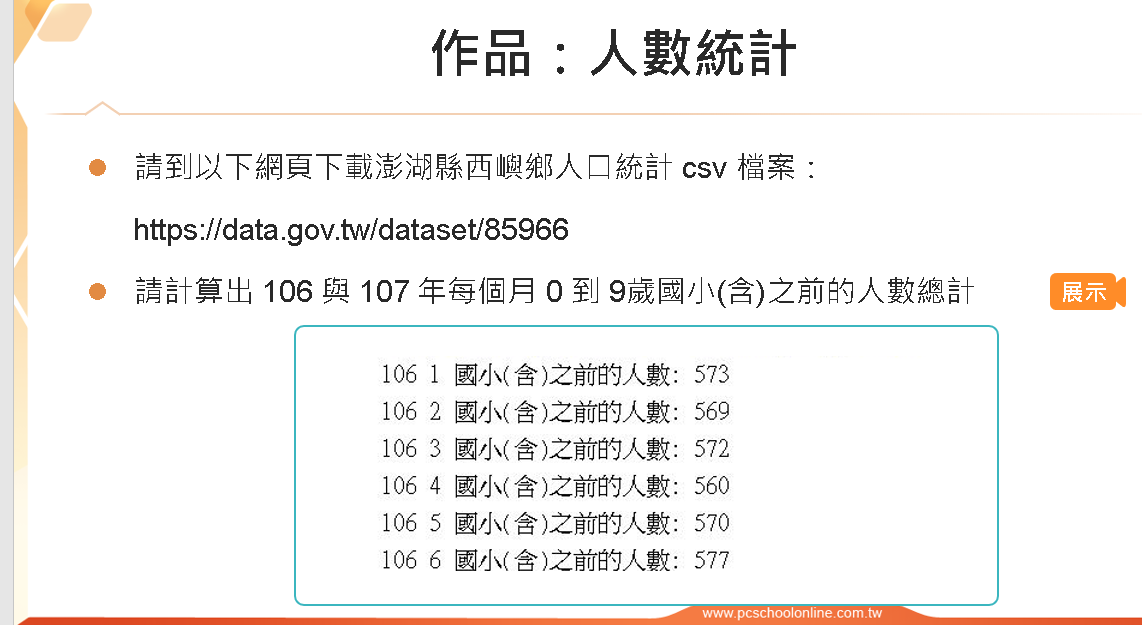

In [ ]:
import numpy as np
a = np.genfromtxt('HW13__Data.csv',dtype='int',delimiter=',', skip_header=1,encoding='utf-8-sig')
a = a[a[:,0]<108]
#print(a)
for data in a:
      print(f'{data[0]} {data[1]}國小(含)之前的人數{data[3:5].sum()}')

## 累加與累差
+ np.cumsum( ) 方法進行指定軸資料的累加。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸則會平坦化後進行累加
+ 維持原有的資料數量，且在計算結果上進行下一個計算。
+ np.diff( ) 方法進行指定軸資料的累差。
+ 參數：
  + array：陣列
  + axis：軸，沒有指定軸預設 axis 為 1
+ 以原資料進行資料內容刪除，若 axis 為 0 則減少一個 row，若 axis 為 1 減少一個 column。

In [3]:
import numpy as np
a = np.array([[1, 2, 3], [13, 6, 9], [12, 24, 36]])
print(a)
print(np.cumsum(a))
print("======================")
print(np.cumsum(a,axis=0))
print("======================")
print(np.cumsum(a,axis=1))

[[ 1  2  3]
 [13  6  9]
 [12 24 36]]
[  1   3   6  19  25  34  46  70 106]
[[ 1  2  3]
 [14  8 12]
 [26 32 48]]
[[ 1  3  6]
 [13 19 28]
 [12 36 72]]


In [6]:
import numpy as np
a = np.array([[1, 2, 3], 
              [13, 6, 9]])
print(a)
print(np.diff(a))#預設axis=1
print("---------------")
print(np.diff(a,axis= 0))
print("---------------")
print(np.diff(a,axis= 1))

[[ 1  2  3]
 [13  6  9]]
[[ 1  1]
 [-7  3]]
---------------
[[12  4  6]]
---------------
[[ 1  1]
 [-7  3]]


# Numpy查找資料與Copy

## 查找資料條件與回傳
+ np.where( ) 方法將會返回輸入陣列中滿足設定的條件之元素索引：
  + np.where(陣列查找資料條件)
  + 傳回值是符合條件的欄位索引值
+ np.extract( ) 方法將會返回滿足任何條件的元素：
  + np.extract(陣列查找資料條件,陣列)
  + 傳回值是符合條件的欄位內容

In [13]:
import numpy as np
a = np.array([0,30,45,60,75,90])
print(a > 15)
b = np.where(a > 15)
print(b)
condition = (np.mod(a,2) == 0)
print(condition)
print()
b = np.where(condition)
print(b)
print(a[b])
print(np.extract(condition,a))

[False  True  True  True  True  True]
(array([1, 2, 3, 4, 5], dtype=int64),)
[ True  True False  True False  True]

(array([0, 1, 3, 5], dtype=int64),)
[ 0 30 60 90]
[ 0 30 60 90]


## 陣列複製
+ 陣列指派拷貝：若以指派的方式將陣列交給另外一個，這兩個陣列的記憶體位址會是相同，兩個的資料變化與形狀變化會是相同。
+ 陣列淺層拷貝：若以 view( ) 方式將陣列交給另外一個，將形狀複製到另外一個陣列，這兩個陣列的記憶體位址不同，兩個陣列形狀變化不會相同，但兩個的資料變化相同。
+ 陣列深層拷貝：若以 copy( ) 方式將陣列交給另外一個，則會將形狀與資料複製到另外一個陣列，這兩個陣列的記憶體位址不同，兩個陣列形狀變化不會相同，兩個的資料變化也不同。

In [18]:
import numpy as np
a = np.arange(6)
print(a)
print("===========================")
print(id(a))
b = a
print("=============================")
print(b)
print(id(b))
print("=============================")
b.shape = 3,2
print(b)
print("=============================")
print(a)
print("=============================")
b[0,0] = 100
print("=============================")
print(a)

[0 1 2 3 4 5]
1256022252976
[0 1 2 3 4 5]
1256022252976
[[0 1]
 [2 3]
 [4 5]]
[[0 1]
 [2 3]
 [4 5]]
[[100   1]
 [  2   3]
 [  4   5]]


## View

In [21]:
import numpy as np
a = np.arange(6)
print(a)
print(id(a))
print("========================")
b = a.view()
print(b)
print(id(b))
print("========================")
b.shape = 3,2
print(a)
print(b)
print("========================")
b[0,0] = 100
print(a)

[0 1 2 3 4 5]
1256065265552
[0 1 2 3 4 5]
1256064771440
[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
[100   1   2   3   4   5]


## 陣列複製

In [24]:
import numpy as np
a = np.arange(6)
print(a)
print(id(a))
print("==============================")
b = a.copy()
print(b)
print(id(b))
print("==============================")
b.shape = 3,2
print(b)
print(a)
print("==============================")
b[0,0] = 100
print(a)
print(b)      

[0 1 2 3 4 5]
1256031989808
[0 1 2 3 4 5]
1256064772688
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[[100   1]
 [  2   3]
 [  4   5]]


## 繪製圖表
+ 請先引用 matplotlib 套件：
  + import matplotlib.pyplot as plt
+ 只有繪製折線圖可使用 plt.plot( ) 方法繪製。
+ 若 plot( ) 方法內只有一個參數，預設為 y 軸資料，x 軸為預設整數值。
+ 若 plot( ) 方法內有兩個參數，代表 x 軸與 y 軸座標，若為四個參數，代表兩條曲線。
+ 最後顯示出圖片請加上 .show( ) 方法。

### 圖表基本區塊
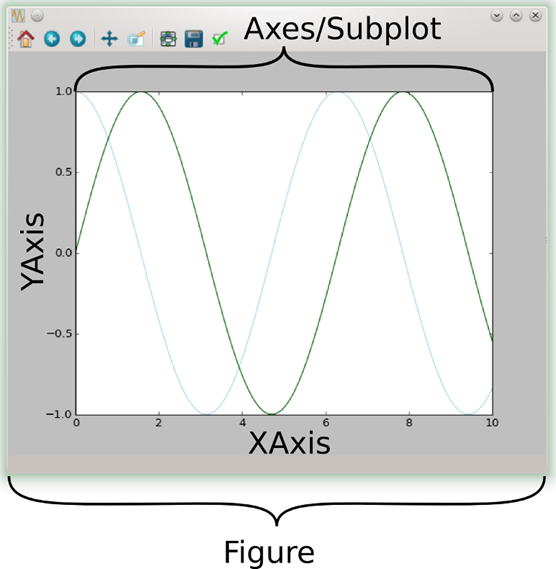

### figure 可加入參數
+ plt.figure( ) 方法會建立一個圖像，該代碼後的所有圖像會繪製到這個圖像中，一個項目中可以添加多個  figure，常用參數如下：
 + num：設置圖像的序號，不設置該參數，自動默認編號。
 + figsize：設置圖像大小。
 + facecolor：圖像前景色。

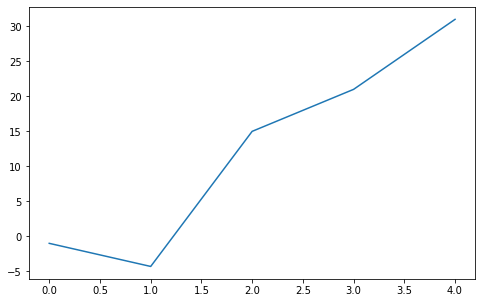

In [26]:
import matplotlib.pyplot as plt
data = [-1,-4.3,15,21,31]
plt.figure(num = 3,figsize=(8,5))
plt.plot(data)
plt.show()

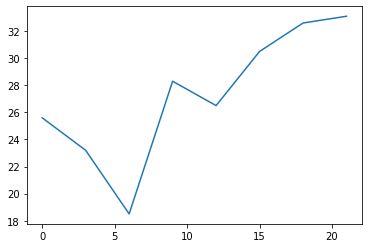

In [27]:
import matplotlib.pyplot as plt
x1 = range(0,22,3)
y1 = [25.6, 23.2, 18.5, 28.3, 26.5, 30.5, 32.6, 33.1]
plt.plot(x1,y1)
plt.show()

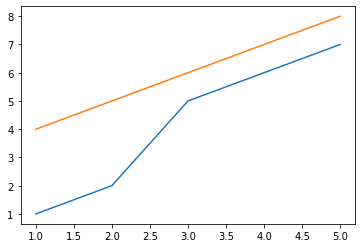

In [28]:
import  matplotlib.pyplot  as  plt
x = [1,2,3,4,5]
y1 = [1,2,5,6,7] 
y2 = [4,5,6,7,8] 
plt.plot(x,y1,x,y2)
plt.show()

## 更改線條外觀
+ plot(）方法內可以加入參數更改線條外觀。
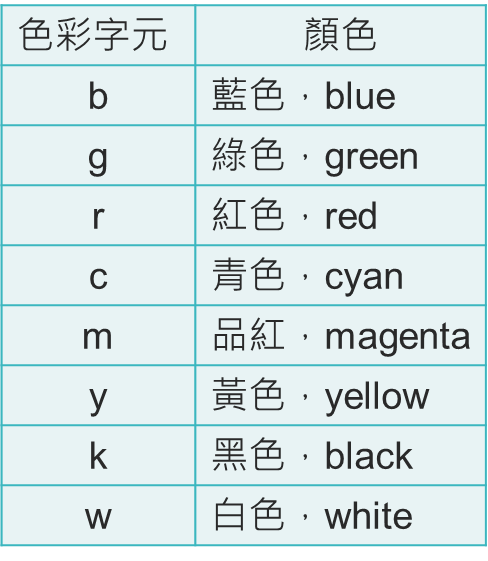
+ plot(）方法內可以加入參數更改線條外觀。
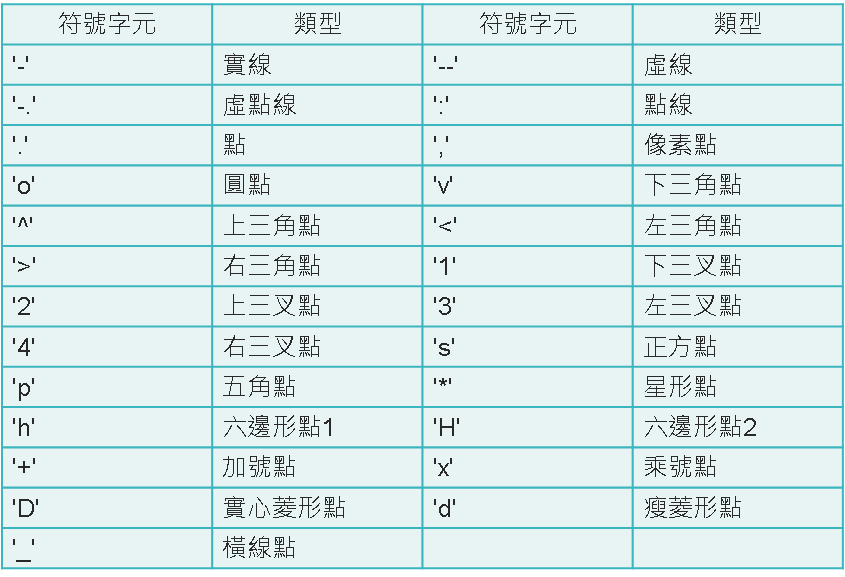

### 圖表格線與座標範圍
+ .grid( ) 方法可以產生格線。
+ 顯示範圍：可以使用 axis 函數指定坐標軸顯示的範圍。
  + plt.axis([xmin, xmax, ymin, ymax])

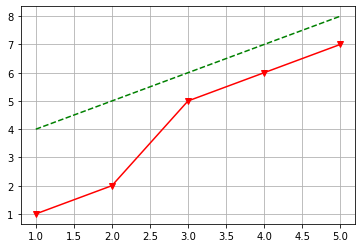

In [31]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y1=[1,2,5,6,7]
y2=[4,5,6,7,8]
plt.plot(x,y1,"r-o",
         x,y2,"g--")
plt.grid()
plt.show()

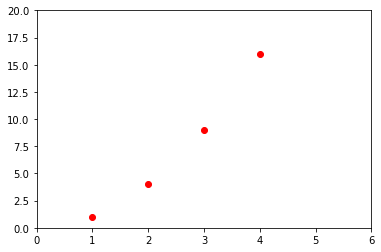

In [32]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.axis([0,6,0,20])
plt.show()

### 圖表標題與座標軸標籤
+ 使用 plt.title( ) 方法顯示圖表標題。
+ 使用 plt.xlim 設置 x 座標軸範圍。
+ 使用 plt.ylim 設置 y 座標軸範圍。
+ 使用 plt.xlabel 設置 x 座標軸名稱。
+ 使用 plt.ylabel 設置 y 座標軸名稱。
+ 使用 plt.xticks 重新設定 x 座標的刻度。
+ 使用 plt.yticks 重新設定 y 座標的刻度。

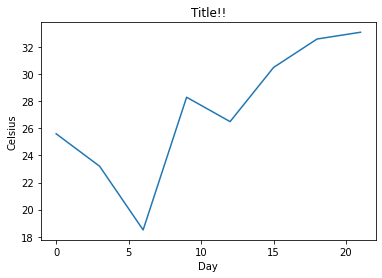

In [34]:
import matplotlib.pyplot as plt
days = range(0, 22, 3)
celsius = [25.6, 23.2, 18.5, 28.3, 26.5, 30.5, 32.6, 33.1]
plt.plot(days,celsius)
plt.xlabel("Day")
plt.ylabel("Celsius")
plt.title("Title!!")
plt.show()

[-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408 -2.3877551
 -2.26530612 -2.14285714 -2.02040816 -1.89795918 -1.7755102  -1.65306122
 -1.53061224 -1.40816327 -1.28571429 -1.16326531 -1.04081633 -0.91836735
 -0.79591837 -0.67346939 -0.55102041 -0.42857143 -0.30612245 -0.18367347
 -0.06122449  0.06122449  0.18367347  0.30612245  0.42857143  0.55102041
  0.67346939  0.79591837  0.91836735  1.04081633  1.16326531  1.28571429
  1.40816327  1.53061224  1.65306122  1.7755102   1.89795918  2.02040816
  2.14285714  2.26530612  2.3877551   2.51020408  2.63265306  2.75510204
  2.87755102  3.        ]


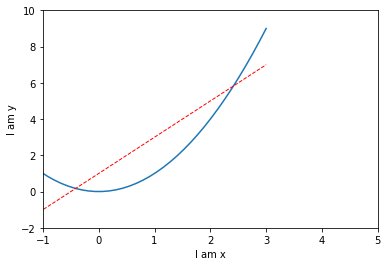

In [44]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3,3,50)
print(x)
y1 = 2 * x + 1
y2 = x ** 2
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth = 1.0,linestyle = '--')
plt.xlim(-1,5)#修改x軸的範圍-1~5
plt.ylim(-2,10)#修改y軸的範圍-2~10
plt.xlabel("I am x")
plt.ylabel("I am y")
plt.show()

[-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408 -2.3877551
 -2.26530612 -2.14285714 -2.02040816 -1.89795918 -1.7755102  -1.65306122
 -1.53061224 -1.40816327 -1.28571429 -1.16326531 -1.04081633 -0.91836735
 -0.79591837 -0.67346939 -0.55102041 -0.42857143 -0.30612245 -0.18367347
 -0.06122449  0.06122449  0.18367347  0.30612245  0.42857143  0.55102041
  0.67346939  0.79591837  0.91836735  1.04081633  1.16326531  1.28571429
  1.40816327  1.53061224  1.65306122  1.7755102   1.89795918  2.02040816
  2.14285714  2.26530612  2.3877551   2.51020408  2.63265306  2.75510204
  2.87755102  3.        ]


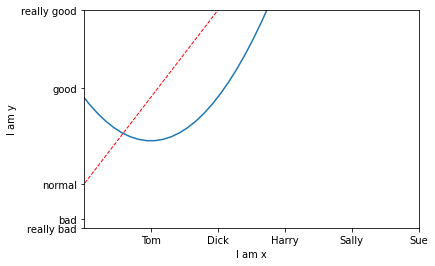

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3,3,50)
print(x)
y1 = 2 * x + 1
y2 = x ** 2
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth = 1.0,linestyle = '--')

plt.xlim((-1,2))
plt.ylim((-2,3))
plt.xlabel("I am x")
plt.ylabel("I am y")
plt.xticks(np.arange(5),("Tom","Dick","Harry","Sally","Sue"))
plt.yticks([-2,-1.8,-1,1.22,3],["really bad","bad","normal","good","really good"])
plt.show()


### 中文與負號顯示

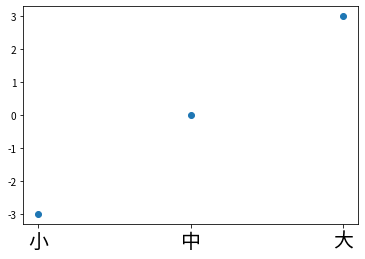

In [3]:
import matplotlib.pyplot as pl 
plt.rcParams['font.sans-serif'] = ['Noto Sans TC']
plt.rcParams['axes.unicode_minus']=False
x_labels = ['小','中','大']
x = range(len(x_labels))
y = [-3,0,3]
plt.scatter(x,y)
plt.xticks(x,x_labels)
plt.tick_params(axis='x',which="major",labelsize=20)
plt.show()

## Bar 與 Stacked Bar
+ Bar  長條圖：可以垂直或水平繪製
+ Stacked  堆疊長條圖：多項資料的數據一一堆疊，可顯示每一長條的相對組成。

matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

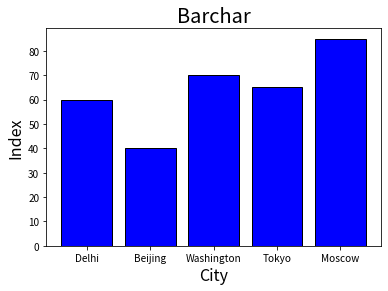

In [4]:
import matplotlib.pyplot as plt
import numpy as np
city = ['Delhi', 'Beijing', 'Washington', 'Tokyo', 'Moscow']
pos = np.arange(len(city))
Happiness_Index = [60, 40, 70, 65, 85]
plt.bar(pos,Happiness_Index,color='blue',edgecolor='black')
plt.xticks(pos,city)
plt.xlabel("City",fontsize=16)
plt.ylabel("Index",fontsize=16)
plt.title("Barchar",fontsize=20)
plt.show()

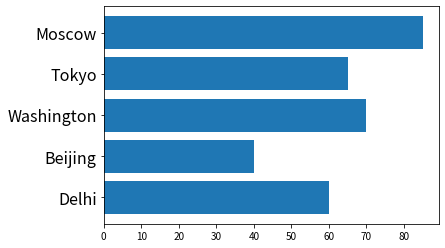

In [6]:
import matplotlib.pyplot as plt
import numpy as np
city = ['Delhi', 'Beijing', 'Washington', 'Tokyo', 'Moscow']
pos = np.arange(len(city))
Happiness_Index = [60, 40, 70, 65, 85]
fig,ax = plt.subplots()
b = ax.barh(range(len(city)),Happiness_Index)
ax.set_yticks(range(len(city)))
ax.set_yticklabels(city,fontsize=16)
plt.show()
